In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# implement Random Forest Regressor
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

from sklearn.linear_model import Ridge, LinearRegression

In [55]:
# Importing the dataset
train_data = pd.read_csv('./Data_Processed/train_processed.csv')
train_target = train_data['price'] 
train_data = train_data.drop('price', axis = 1)

test_data = pd.read_csv('./Data_Processed/test_processed.csv')
test_id = test_data['id']
test_data = test_data.drop('id', axis = 1)

### XGB

In [56]:
param_grid_XGB = {
    'n_estimators' : [1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

XGB = XGBRegressor(objective='reg:squarederror',
                   eval_metric='rmse',
                   random_state=42)
grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = param_grid_XGB, cv = kfold,
                                n_jobs = -1, scoring='neg_root_mean_squared_error',verbose=1,)
grid_search_XGB.fit(train_data, train_target)
print(grid_search_XGB.best_params_)
print(-grid_search_XGB.best_score_)

# Extract the results from the grid search
cv_results = grid_search_XGB.cv_results_

# Extract information for plotting
mean_test_scores_2 = -cv_results['mean_test_score']  # Convert negative RMSE to positive RMSE
learning_rate_values = param_grid_XGB['learning_rate']


Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'learning_rate': 0.05, 'n_estimators': 1000}
0.7273765285304654


In [57]:
param_grid_XGB = {
    'n_estimators' : [1000],
    'learning_rate': [0.05],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

XGB = XGBRegressor(objective='reg:squarederror',
                   eval_metric='rmse',
                   random_state=42)
grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = param_grid_XGB, cv = kfold,
                                n_jobs = -1, scoring='neg_root_mean_squared_error',verbose=1,)
grid_search_XGB.fit(train_data, train_target)
print(grid_search_XGB.best_params_)
print(-grid_search_XGB.best_score_)

# Extract the results from the grid search
cv_results = grid_search_XGB.cv_results_

# Extract information for plotting
mean_test_scores_3 = -cv_results['mean_test_score']  # Convert negative RMSE to positive RMSE
max_depth_values = param_grid_XGB['max_depth']


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1000}
0.7261447307595488


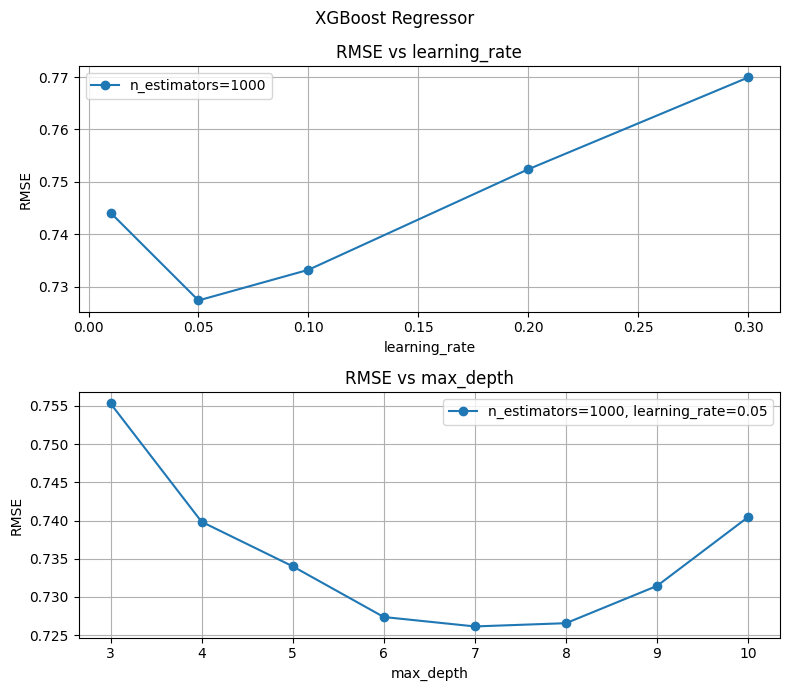

In [58]:
plt.figure(figsize=(8, 7))
plt.subplot(2,1, 1)
plt.plot(learning_rate_values, mean_test_scores_2, label='n_estimators=1000', marker='o')
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.title('RMSE vs learning_rate')
plt.legend()
plt.grid()

plt.subplot(2,1, 2)
plt.plot(max_depth_values, mean_test_scores_3, label='n_estimators=1000, learning_rate=0.05', marker='o')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs max_depth')
plt.legend()
plt.grid()
plt.suptitle('XGBoost Regressor')
plt.tight_layout()
plt.show()

In [59]:
# XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

# fit the model
xgb_model.fit(train_data, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### CatBoost

In [60]:
param_grid_cbr = {
    'iterations': [1000],
    'learning_rate': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # Optionally tune other hyperparameters as well
}

CBR = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    l2_leaf_reg=3,
    border_count=32,
    random_seed=42,
    verbose=0
)

grid_search_cbr = GridSearchCV(estimator = CBR, param_grid = param_grid_cbr, cv = kfold, 
                                n_jobs = -1, scoring='neg_root_mean_squared_error', verbose=1)
grid_search_cbr.fit(train_data, train_target)

print(grid_search_cbr.best_params_)
print(-grid_search_cbr.best_score_)

# Extract the results from the grid search
cv_results = grid_search_cbr.cv_results_

# Extract information for plotting
mean_test_scores_cbr_1 = -cv_results['mean_test_score']  # Convert negative RMSE to positive RMSE
learning_rate_values_cbr = param_grid_cbr['learning_rate']

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'iterations': 1000, 'learning_rate': 0.07}
0.7274964333765268


In [61]:
param_grid_cbr = {
    'iterations': [1000],
    'learning_rate': [0.07],
    'depth': [5, 6, 7, 8, 9, 10]
}

CBR = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    l2_leaf_reg=3,
    border_count=32,
    random_seed=42,
    verbose=0
)

grid_search_cbr = GridSearchCV(estimator = CBR, param_grid = param_grid_cbr, cv = kfold,
                                n_jobs = -1, scoring='neg_root_mean_squared_error',verbose=1,)
grid_search_cbr.fit(train_data, train_target)
print(grid_search_cbr.best_params_)
print(-grid_search_cbr.best_score_)
# Extract the results from the grid search
cv_results = grid_search_cbr.cv_results_

# Extract information for plotting
mean_test_scores_cbr_2 = -cv_results['mean_test_score']  # Convert negative RMSE to positive RMSE
depth_values_cbr = param_grid_cbr['depth']


Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'depth': 8, 'iterations': 1000, 'learning_rate': 0.07}
0.7222507870991769


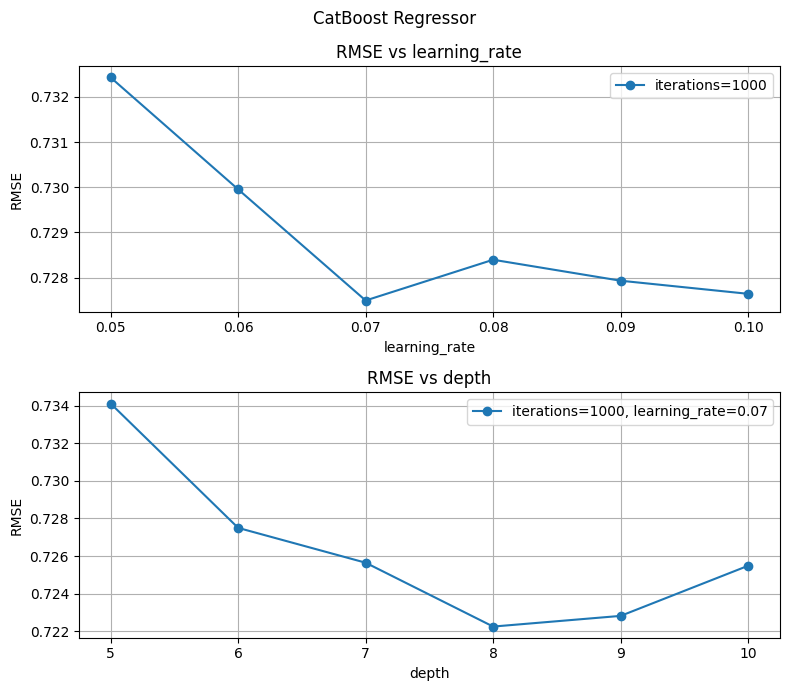

In [62]:
# Plot the results
plt.figure(figsize=(8, 7))
plt.subplot(2, 1, 1)
plt.plot(learning_rate_values_cbr, mean_test_scores_cbr_1, label='iterations=1000', marker='o')
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.title('RMSE vs learning_rate')
plt.legend()
plt.grid()

plt.subplot(2,1, 2)
plt.plot(depth_values_cbr, mean_test_scores_cbr_2, label='iterations=1000, learning_rate=0.07', marker='o')
plt.xlabel('depth')
plt.ylabel('RMSE')
plt.title('RMSE vs depth')
plt.legend()
plt.grid()
plt.suptitle('CatBoost Regressor')
plt.tight_layout()
plt.show()

In [63]:
# CatBoost Regressor
catboost_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    iterations=900,
    learning_rate=0.07,
    depth=8,
    l2_leaf_reg=3,
    border_count=32,
    random_seed=42,
    verbose=0
)

# fit the model
catboost_model.fit(train_data, train_target)

### Random Forest

In [64]:
param_grid_rf = {
    'n_estimators': [ 200, 400, 500, 600, 800],
}

RF = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator = RF, param_grid = param_grid_rf, cv = kfold,
                                n_jobs = -1, scoring='neg_root_mean_squared_error',verbose=1,)
grid_search_rf.fit(train_data, train_target)
print(grid_search_rf.best_params_)
print(-grid_search_rf.best_score_)
# Extract the results from the grid search
cv_results = grid_search_rf.cv_results_

# Extract information for plotting
mean_test_scores_rf = -cv_results['mean_test_score']  # Convert negative RMSE to positive RMSE
n_estimators_values_rf = param_grid_rf['n_estimators']

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 800}
0.7659746389170656


In [65]:
param_grid_rf = {
    'n_estimators': [500],
    'max_depth': [5, 10, None]
}

RF = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator = RF, param_grid = param_grid_rf, cv = kfold,
                                n_jobs = -1, scoring='neg_root_mean_squared_error',verbose=1,)
grid_search_rf.fit(train_data, train_target)
print(grid_search_rf.best_params_)
print(-grid_search_rf.best_score_)
# Extract the results from the grid search
cv_results = grid_search_rf.cv_results_

# Extract information for plotting
mean_test_scores_rf_2 = -cv_results['mean_test_score']  # Convert negative RMSE to positive RMSE
max_depth_values_rf = ['5', '10', 'None (Full Depth)']


Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'max_depth': None, 'n_estimators': 500}
0.7663590843606178


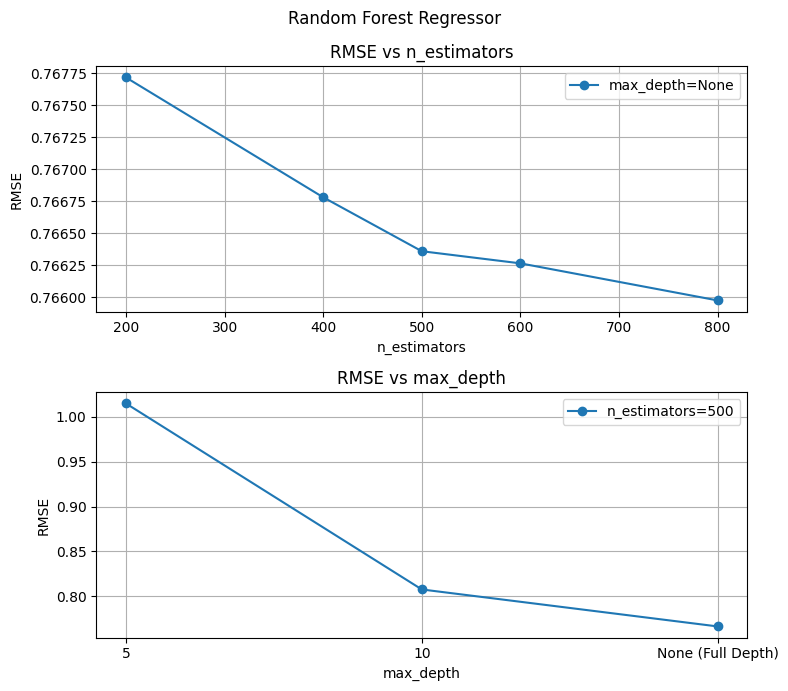

In [66]:
# Plot the results
plt.figure(figsize=(8, 7))
plt.subplot(2, 1, 1)
plt.plot(n_estimators_values_rf, mean_test_scores_rf, label='max_depth=None', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.legend()
plt.grid()

plt.subplot(2,1, 2)
plt.plot(max_depth_values_rf, mean_test_scores_rf_2, label='n_estimators=500', marker='o')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE vs max_depth')
plt.legend()
plt.grid()
plt.suptitle('Random Forest Regressor')
plt.tight_layout()
plt.show()

In [67]:
# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

# fit the model
rf_model.fit(train_data, train_target)

RandomForestRegressor(n_estimators=500, random_state=42)

### Extra Trees

In [68]:
etr_model = ExtraTreesRegressor(
    n_estimators=500, 
    max_depth=None, 
    random_state=42, 
    n_jobs=-1
)

# fit the model
etr_model.fit(train_data, train_target)

ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=42)

### Stacking

In [69]:
# Linear Regression
lr = LinearRegression()

# XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

# CatBoost Regressor
cbr_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    iterations=900,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    border_count=32,
    random_seed=42,
    verbose=0
)

# Extra Trees Regressor
etr_model = ExtraTreesRegressor(
    n_estimators=500, 
    max_depth=None, 
    random_state=42, 
    n_jobs=-1
)

# Define final estimator
final_estimator = Ridge(alpha=1.0)

In [70]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

estimators = [
    ('lr', lr),
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('catboost', cbr_model),
    ('etr', etr_model)
]

# Define final estimator
final_estimator = Ridge(alpha=1.0)

# Set up StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=kfold,
    n_jobs=-1,
    passthrough=False,
    verbose=1
)

# Train StackingRegressor
stacking_regressor.fit(train_data, train_target)

# Evaluate performance
cv_results_stack = -1 * cross_val_score(
    stacking_regressor, train_data, train_target, cv=kfold, scoring='neg_root_mean_squared_error', n_jobs=-1
)
print(f"Stacking Regressor CV RMSE: {cv_results_stack.mean():.4f}")

Stacking Regressor CV RMSE: 0.7085


In [71]:
print(stacking_regressor.score(train_data, train_target))

0.9797390853839248
